In [1]:
#pip install tf_keras

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

2024-04-28 17:21:19.057959: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-28 17:21:19.058069: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-28 17:21:19.176467: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
print(tf.__version__)

2.15.0


In [4]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("/kaggle/input/horses-vs-humans"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '/kaggle/input/horses-vs-humans'
There are 2 directories and 0 images in '/kaggle/input/horses-vs-humans/validation-horse-or-human'
There are 0 directories and 128 images in '/kaggle/input/horses-vs-humans/validation-horse-or-human/humans'
There are 0 directories and 128 images in '/kaggle/input/horses-vs-humans/validation-horse-or-human/horses'
There are 2 directories and 0 images in '/kaggle/input/horses-vs-humans/horse-or-human'
There are 0 directories and 527 images in '/kaggle/input/horses-vs-humans/horse-or-human/humans'
There are 0 directories and 500 images in '/kaggle/input/horses-vs-humans/horse-or-human/horses'


In [5]:
import pathlib

data_dir = pathlib.Path("/kaggle/input/horses-vs-humans/horse-or-human") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['horses' 'humans']


In [6]:
# View an image
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (300, 300, 4)


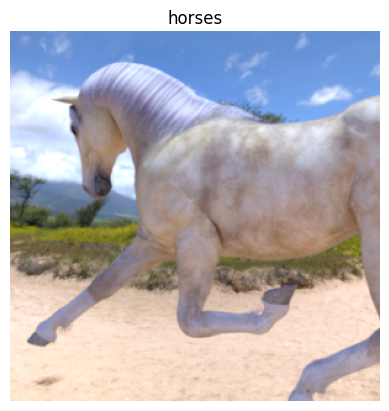

In [7]:
# View a random image from the training dataset
img = view_random_image(target_dir="/kaggle/input/horses-vs-humans/horse-or-human/",target_class="horses")

Image shape: (300, 300, 4)


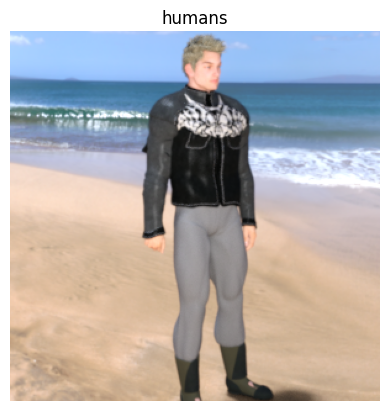

In [13]:
img = view_random_image(target_dir="/kaggle/input/horses-vs-humans/horse-or-human/",target_class="humans")

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the 
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "/kaggle/input/horses-vs-humans/horse-or-human"
test_dir = "/kaggle/input/horses-vs-humans/validation-horse-or-human"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42,
                                               shuffle=True)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42,
                                               shuffle=True)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [15]:
# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/10


I0000 00:00:1714324916.513695     181 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


33/33 [==============================] - 26s 645ms/step - loss: 0.6231 - accuracy: 0.6845 - val_loss: 0.8709 - val_accuracy: 0.5391
Epoch 2/10
33/33 [==============================] - 17s 500ms/step - loss: 0.5375 - accuracy: 0.7468 - val_loss: 1.4255 - val_accuracy: 0.5273
Epoch 3/10
33/33 [==============================] - 17s 513ms/step - loss: 0.4562 - accuracy: 0.8014 - val_loss: 1.4620 - val_accuracy: 0.5547
Epoch 4/10
33/33 [==============================] - 16s 497ms/step - loss: 0.3843 - accuracy: 0.8306 - val_loss: 2.1362 - val_accuracy: 0.5898
Epoch 5/10
33/33 [==============================] - 17s 506ms/step - loss: 0.3653 - accuracy: 0.8423 - val_loss: 3.4784 - val_accuracy: 0.5547
Epoch 6/10
33/33 [==============================] - 17s 503ms/step - loss: 0.3945 - accuracy: 0.8277 - val_loss: 3.1164 - val_accuracy: 0.5625
Epoch 7/10
33/33 [==============================] - 16s 497ms/step - loss: 0.4790 - accuracy: 0.7936 - val_loss: 1.8550 - val_accuracy: 0.5625
Epoch 8/10

In [16]:
loss,accuracy=model_1.evaluate(valid_data)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

8/8 [==============================] - 1s 130ms/step - loss: 2.7540 - accuracy: 0.5625
Model loss on the test set: 2.7540242671966553
Model accuracy on the test set: 56.25%


<Axes: >

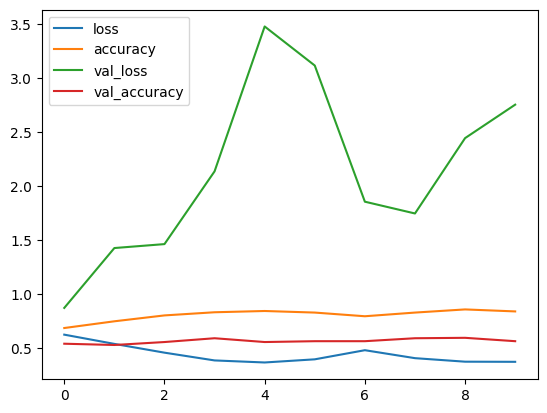

In [17]:
pd.DataFrame(history_1.history).plot()

In [18]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

# Use Transfer learning

In [19]:
import tensorflow as tf
import tensorflow_hub as hub
import tf_keras as keras

In [20]:
feature_extractor_layer = hub.KerasLayer("https://www.kaggle.com/models/tensorflow/resnet-50/TensorFlow2/classification/1",
                                        trainable=False, # freeze the underlying patterns
                                        name='feature_extraction_layer',
                                        input_shape=(224,224,3)) # define the input image shape
  
  # Create our own model
model_tl = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    tf.keras.layers.Dense(1, activation='sigmoid') # create our own output layer     
  ])

# Compile
model_tl.compile(loss='binary_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

Attaching model 'tensorflow/resnet-50/tensorflow2/classification/1' to your Kaggle notebook...


In [21]:
history_2 = model_tl.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
33/33 [==============================] - 25s 509ms/step - loss: 0.6833 - accuracy: 0.8549 - val_loss: 0.6760 - val_accuracy: 0.9844
Epoch 2/5
33/33 [==============================] - 17s 521ms/step - loss: 0.6740 - accuracy: 0.9688 - val_loss: 0.6656 - val_accuracy: 0.9961
Epoch 3/5
33/33 [==============================] - 17s 502ms/step - loss: 0.6650 - accuracy: 0.9669 - val_loss: 0.6554 - val_accuracy: 0.9961
Epoch 4/5
33/33 [==============================] - 17s 512ms/step - loss: 0.6563 - accuracy: 0.9669 - val_loss: 0.6457 - val_accuracy: 0.9922
Epoch 5/5
33/33 [==============================] - 18s 534ms/step - loss: 0.6477 - accuracy: 0.9669 - val_loss: 0.6357 - val_accuracy: 0.9922


In [22]:
loss,accuracy=model_tl.evaluate(valid_data)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

8/8 [==============================] - 1s 156ms/step - loss: 0.6357 - accuracy: 0.9922
Model loss on the test set: 0.6356759667396545
Model accuracy on the test set: 99.22%


<Axes: >

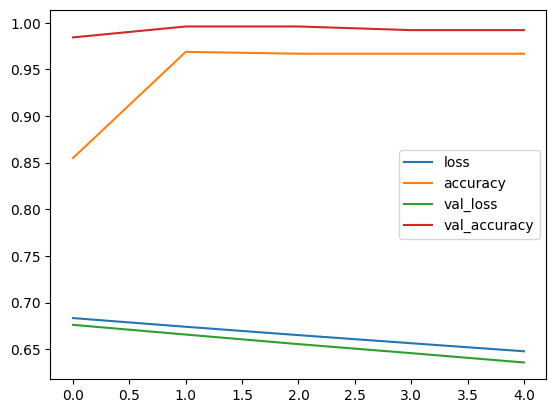

In [23]:
pd.DataFrame(history_2.history).plot()

# Download sample image from internet and predict

--2024-04-28 17:26:54--  https://img.freepik.com/free-photo/peaceful-boy-showing-crossed-arms_1149-1248.jpg
Resolving img.freepik.com (img.freepik.com)... 23.6.117.27, 23.6.117.33, 2600:1402:3800::1706:751b, ...
Connecting to img.freepik.com (img.freepik.com)|23.6.117.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27246 (27K) [image/jpeg]
Saving to: 'human.jpg'

human.jpg           100%[===================>]  26.61K  --.-KB/s    in 0.001s  

2024-04-28 17:26:55 (35.1 MB/s) - 'human.jpg' saved [27246/27246]



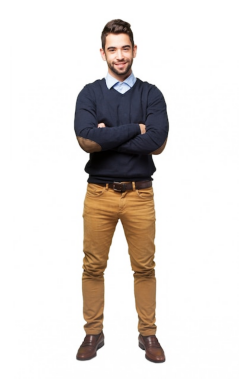

In [24]:
# View our example image
!wget -O human.jpg https://img.freepik.com/free-photo/peaceful-boy-showing-crossed-arms_1149-1248.jpg
steak = mpimg.imread("human.jpg")
plt.imshow(steak)
plt.axis(False);

In [25]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [26]:
# Load in and preprocess our custom image
human = load_and_prep_image("human.jpg")

In [27]:
# The batch size becomes the first dimension. So in reality, our model was trained on data in the shape of (batch_size, 224, 224, 3).
print(f"Shape before new dimension: {human.shape}")
dog_cartoon = tf.expand_dims(human, axis=0) # add an extra dimension at axis 0
print(f"Shape after new dimension: {human.shape}")

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (224, 224, 3)


In [28]:
def make_predictions(model,image,class_names):
    image_convert_dim = tf.expand_dims(image, axis=0) # add an extra dimension at axis 0
    prediction = model.predict(image_convert_dim)
    pred_class = class_names[int(tf.round(prediction)[0][0])]
    print(f"The image belong to {pred_class} category")

In [29]:
make_predictions(model_tl,human,class_names)

1/1 [==============================] - 1s 1s/step
The image belong to humans category
